In [1]:
import pandas as pd


In [2]:
# Read the CSV file
df = pd.read_csv('/home/tsoien/github/newML/backend/data/Disease_symptom_and_patient_profile_dataset.csv')

# Display the first few rows of the dataframe
df.shape

(349, 10)

In [3]:
print(df.columns)

Index(['Disease', 'Gender', 'Fever', 'Cough', 'Fatigue',
       'Difficulty_Breathing', 'Age', 'Blood_Pressure', 'Cholesterol_Level',
       'Outcome_Variable'],
      dtype='object')


In [4]:
print(df['Disease'].unique())

['Influenza' 'Common Cold' 'Eczema' 'Asthma' 'Hyperthyroidism'
 'Allergic Rhinitis' 'Anxiety Disorders' 'Diabetes' 'Gastroenteritis'
 'Pancreatitis' 'Rheumatoid Arthritis' 'Depression' 'Liver Cancer'
 'Stroke' 'Urinary Tract Infection' 'Dengue Fever' 'Hepatitis'
 'Kidney Cancer' 'Migraine' 'Muscular Dystrophy' 'Sinusitis'
 'Ulcerative Colitis' 'Bipolar Disorder' 'Bronchitis' 'Cerebral Palsy'
 'Colorectal Cancer' 'Hypertensive Heart Disease' 'Multiple Sclerosis'
 'Myocardial Infarction (Heart...' 'Urinary Tract Infection (UTI)'
 'Osteoporosis' 'Pneumonia' 'Atherosclerosis'
 'Chronic Obstructive Pulmonary...' 'Epilepsy' 'Hypertension'
 'Obsessive-Compulsive Disorde...' 'Psoriasis' 'Rubella' 'Cirrhosis'
 'Conjunctivitis (Pink Eye)' 'Liver Disease' 'Malaria' 'Spina Bifida'
 'Kidney Disease' 'Osteoarthritis' 'Klinefelter Syndrome' 'Acne'
 'Brain Tumor' 'Cystic Fibrosis' 'Glaucoma' 'Rabies' 'Chickenpox'
 'Coronary Artery Disease' 'Eating Disorders (Anorexia,...' 'Fibromyalgia'
 'Hemophilia' 

In [5]:
def rename_col(s):
    s = s.replace(' ', '_')
    s = s.replace('-', '_')
    a = s.split('_')
    for i in range(len(a)):
        if not all([c == c.upper() for c in a[i]]):
            a[i] = a[i].capitalize()
    return '_'.join(a)

df.columns = [rename_col(c) for c in df.columns]
df.columns

Index(['Disease', 'Gender', 'Fever', 'Cough', 'Fatigue',
       'Difficulty_Breathing', 'Age', 'Blood_Pressure', 'Cholesterol_Level',
       'Outcome_Variable'],
      dtype='object')

In [6]:
df.head()

,Disease,Gender,Fever,Cough,Fatigue,Difficulty_Breathing,Age,Blood_Pressure,Cholesterol_Level,Outcome_Variable
0,Influenza,Female,Yes,No,Yes,Yes,19,Low,Normal,Positive
1,Common Cold,Female,No,Yes,Yes,No,25,Normal,Normal,Negative
2,Eczema,Female,No,Yes,Yes,No,25,Normal,Normal,Negative
3,Asthma,Male,Yes,Yes,No,Yes,25,Normal,Normal,Positive
4,Asthma,Male,Yes,Yes,No,Yes,25,Normal,Normal,Positive


In [7]:
cols = ['Fever', 'Cough', 'Fatigue', 'Difficulty_Breathing']
for c in cols:
    df[c] = df[c].apply(lambda x : 1 if x == 'Yes' else 0)

In [8]:
p = df[df.Outcome_Variable == 'Positive'].copy()

In [9]:
(
    p[p.Disease.isin(p.Disease.value_counts().nlargest(10).index)]
    .groupby('Disease')[cols]
    .sum()
    .style
    .highlight_max(axis=1, color='red')
)

,Fever,Cough,Fatigue,Difficulty_Breathing
Disease,,,,
Asthma,17,13,7,17
Bronchitis,5,4,4,5
Diabetes,4,3,5,1
Hypertension,3,0,4,0
Hypothyroidism,2,2,4,0
Influenza,6,5,6,5
Migraine,3,2,2,0
Osteoporosis,5,3,7,1
Pneumonia,4,4,5,5


<Axes: ylabel='Disease'>

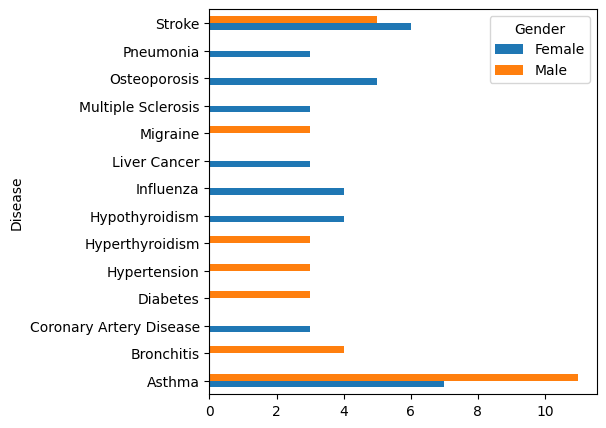

In [10]:
t = p.groupby(['Disease','Gender']).size()
t[t > 2].unstack().plot(kind='barh', figsize=(5,5))

In [11]:
def age_group(x):
  if x < 13:
    return 'kid'
  elif x < 20:
    return 'teen'
  elif x <= 60:
    return 'adult'
  else:
    return 'senior'

df['Age_Group'] = df.Age.apply(age_group)
p = df[df.Outcome_Variable == 'Positive'].copy()

<Axes: ylabel='Disease'>

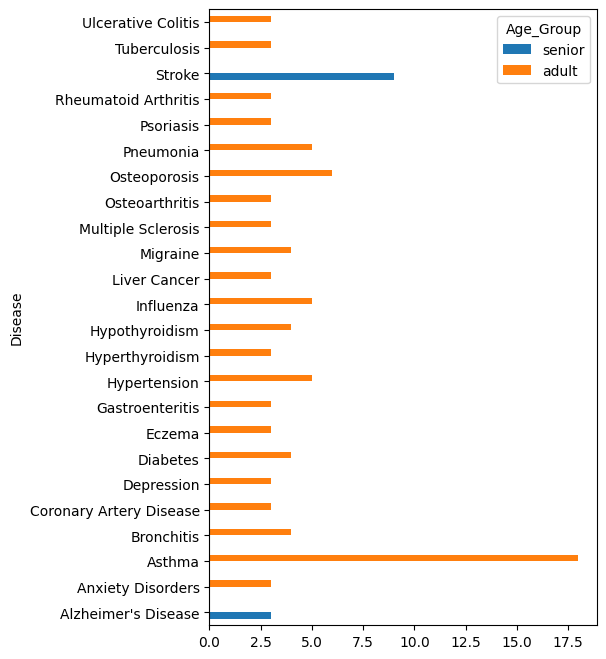

In [12]:
t = p.groupby(['Disease','Age_Group']).size()
t[t > 2].unstack().plot(kind='barh', figsize=(5,8))

In [13]:
p.Blood_Pressure.value_counts()

Blood_Pressure
High      104
Normal     78
Low         4
Name: count, dtype: int64

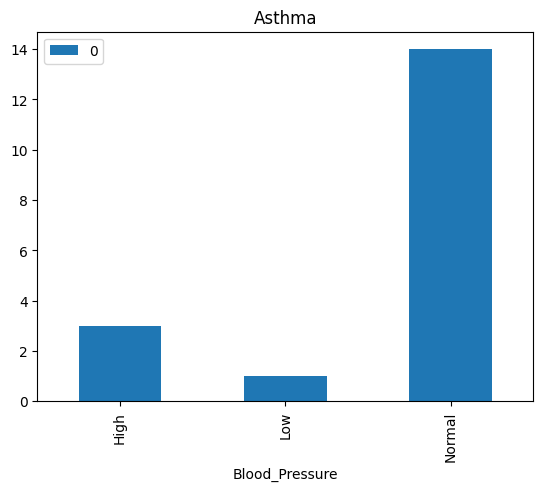

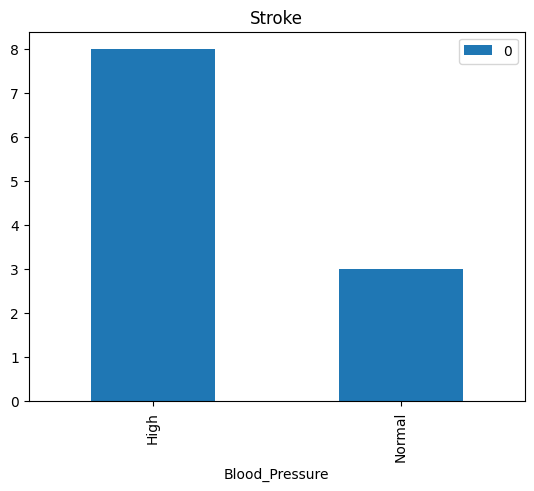

In [14]:
for d in p.Disease.unique():
    s = p[p.Disease == d].groupby('Blood_Pressure').size()
    if (s >= 5).any():
        s.to_frame().plot(kind='bar', title=d)

In [15]:
p.Cholesterol_Level.value_counts()

Cholesterol_Level
High      115
Normal     61
Low        10
Name: count, dtype: int64

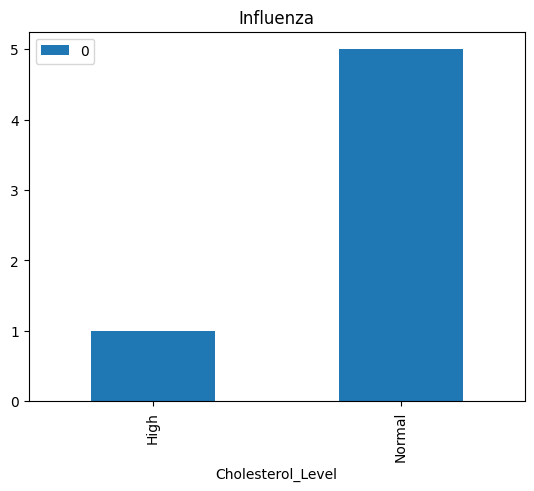

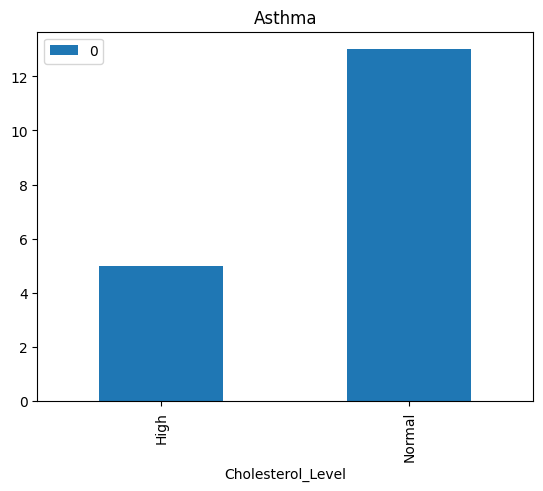

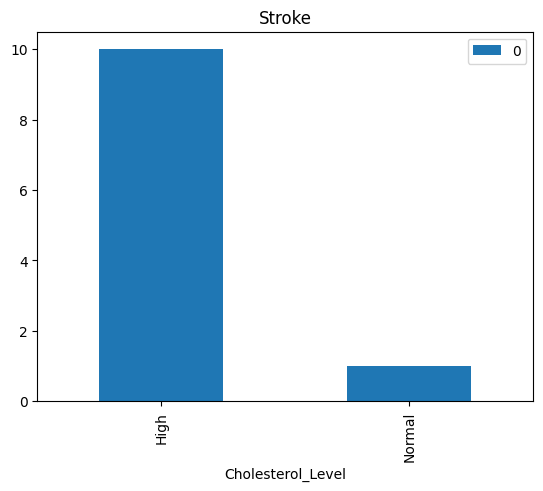

In [16]:
for d in p.Disease.unique():
    s = p[p.Disease == d].groupby('Cholesterol_Level').size()
    if (s >= 5).any():
        s.to_frame().plot(kind='bar', title=d)

<Axes: xlabel='Gender'>

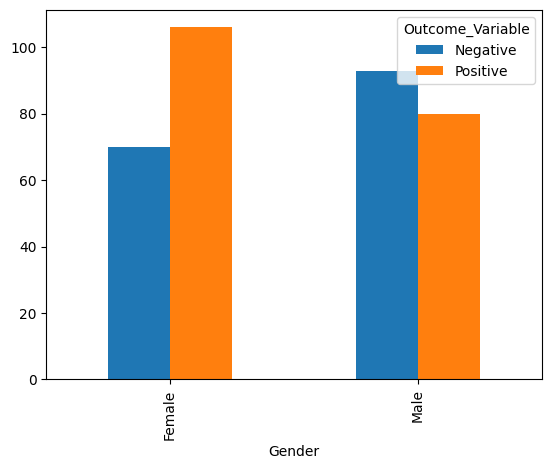

In [17]:
df.groupby(['Gender', 'Outcome_Variable']).size().unstack().plot(kind='bar')

<Axes: xlabel='Age_Group'>

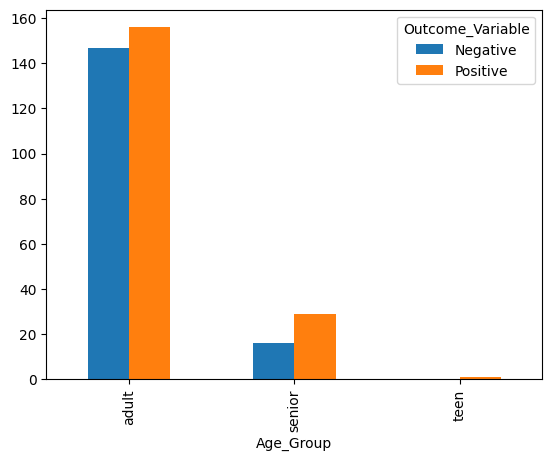

In [18]:
df.groupby(['Age_Group', 'Outcome_Variable']).size().unstack().plot(kind='bar')

<Axes: xlabel='Fever-Cough-Fatigue-Difficulty_Breathing'>

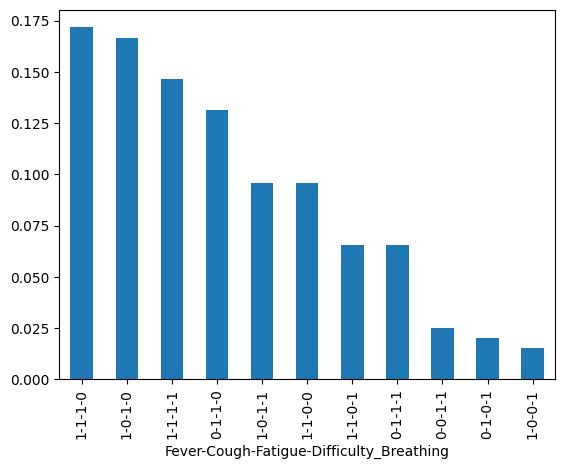

In [19]:
cols = ['Fever', 'Cough', 'Fatigue', 'Difficulty_Breathing']
t = df[cols].copy()
t['Total'] = t.sum(axis=1)
t = t[t.Total > 1].copy()

symptom_combinations = t[cols].astype(str).agg('-'.join, axis=1)
symptom_combinations.value_counts(normalize=True).plot(kind='bar', xlabel='Fever-Cough-Fatigue-Difficulty_Breathing')

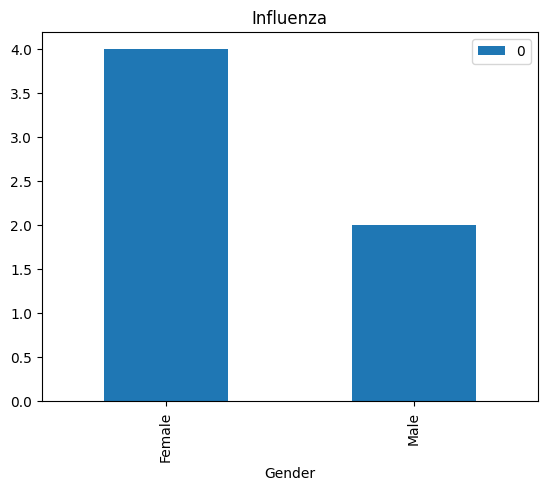

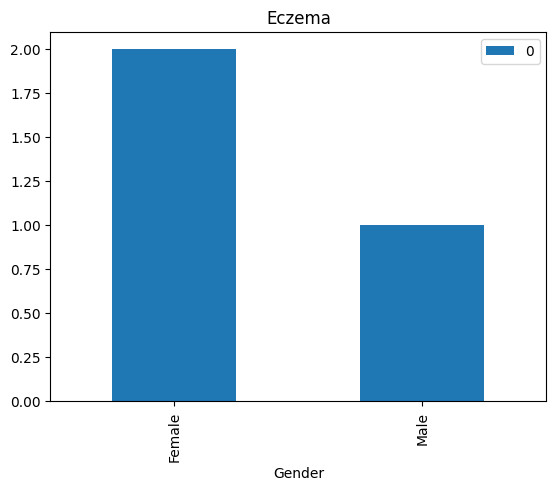

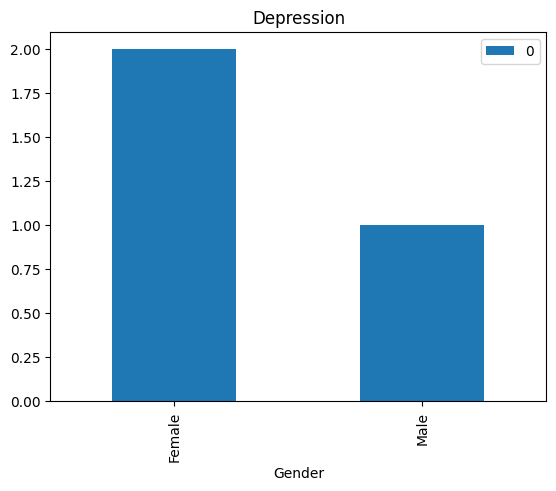

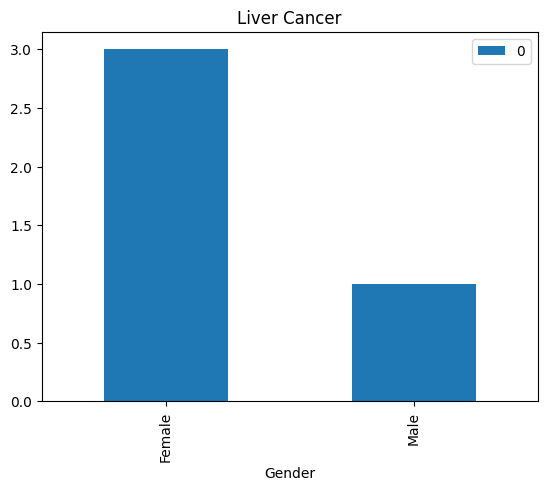

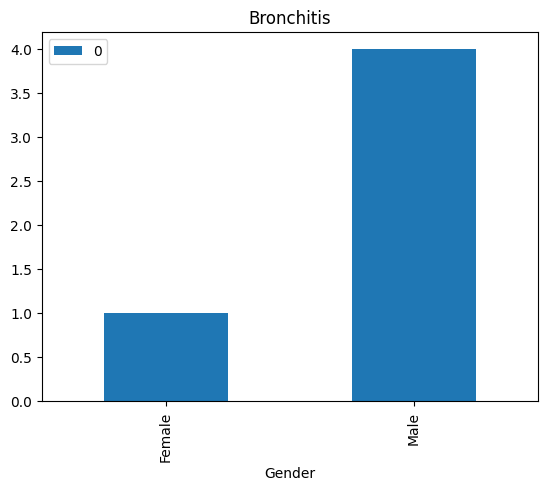

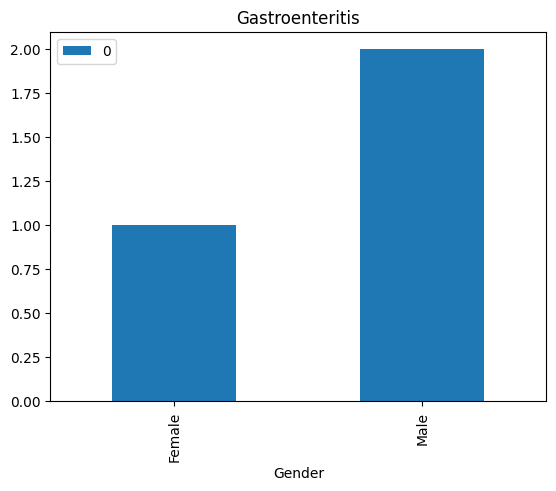

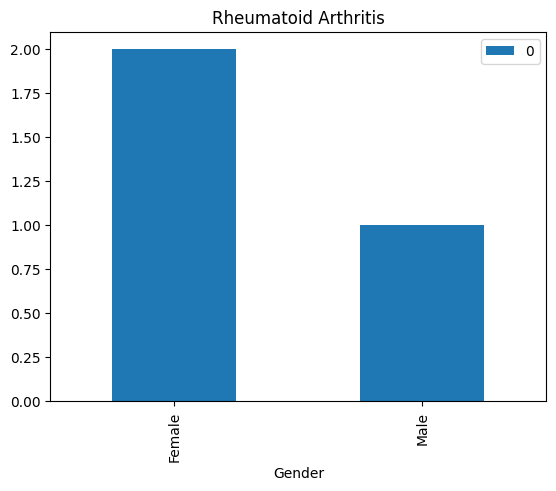

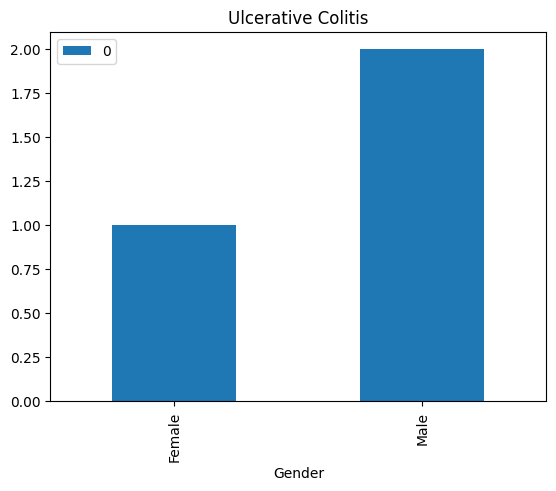

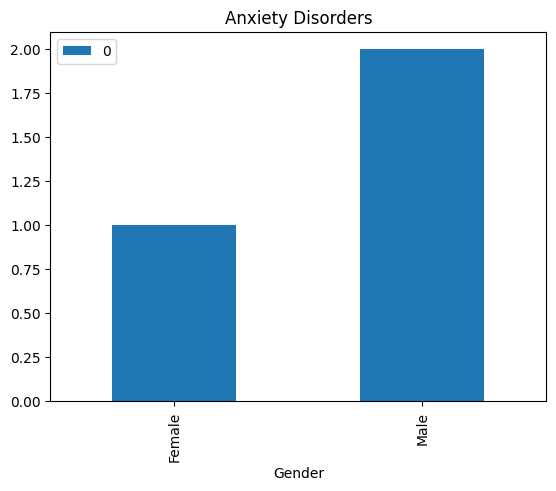

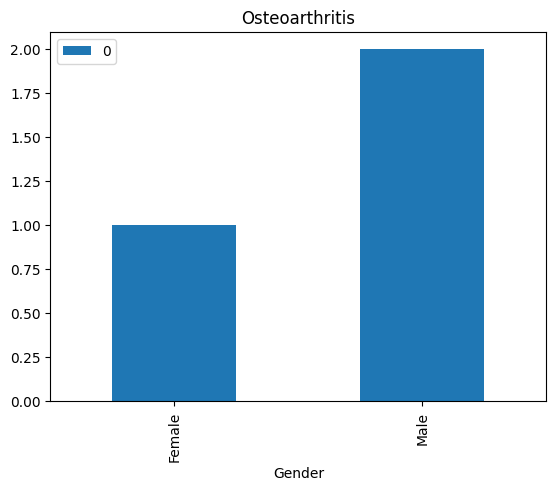

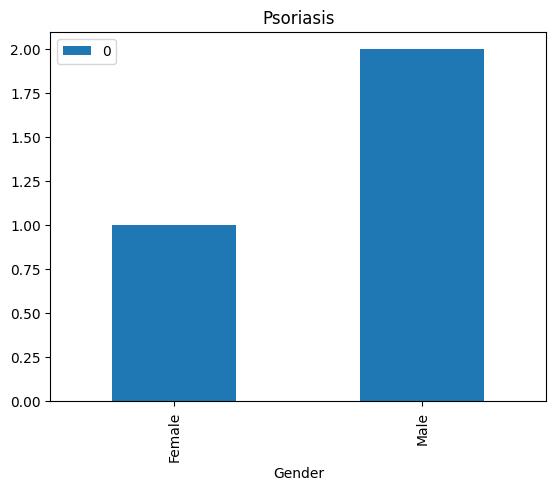

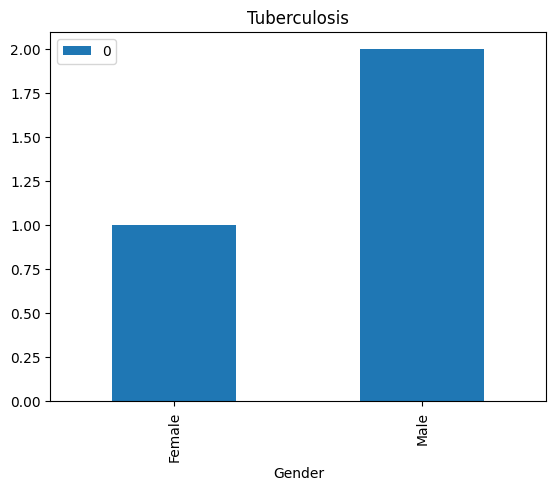

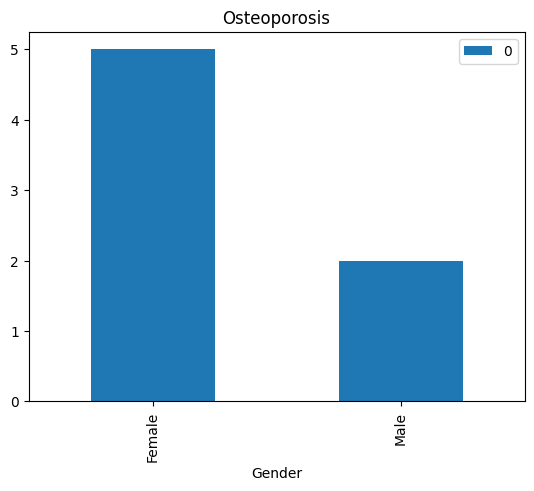

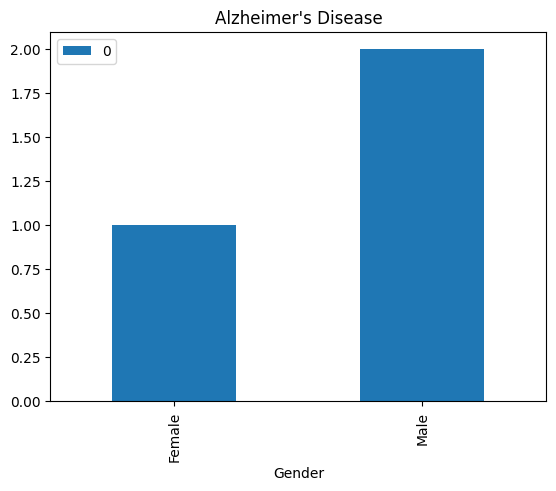

In [20]:
for d in p.Disease.unique():
    s = p[p.Disease == d].groupby('Gender').size()
    if s.max() / s.min() >= 2:
        s.to_frame().plot(kind='bar', title=d)

In [21]:
cols = ['Fever', 'Cough', 'Fatigue', 'Difficulty_Breathing']
for c in cols:
    print(f'{c} is associated with {df[df[c] == 1].Disease.unique().size} diseases')

Fever is associated with 60 diseases
Cough is associated with 58 diseases
Fatigue is associated with 102 diseases
Difficulty_Breathing is associated with 32 diseases
